# Etude de la détection automatique de caractéristiques sur un signal audio
![ISEN Lille](src/isen.jpg)

# Support de tests

Ce Notebook est une version allégée du **Compte-rendu**.
Elle permet d'effectuer rapidement les tests en chargeant directement tous les fichiers nécessaires.

In [1]:
%%html
<script>
IPython.OutputArea.prototype._should_scroll = lines => { return false }  
</script>
<style>
.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; }
.output_stderr { display: none; }
.ui-resizable { pointer-events:none; }
</style>

In [2]:
# Chemin vers les bibliothèques Python
lib_path = "C:\Program Files\Python36\Lib\site-packages"

In [26]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
%run -i bin/imports.py
%run -i bin/imports_pyaudio.py
%run -i bin/bandpass.py
%run -i bin/compare.py
%run -i bin/compute.py
%run -i bin/cut.py
%run -i bin/drc.py
%run -i bin/drcz.py
%run -i bin/energies.py
%run -i bin/energy.py
%run -i bin/gen_data.py
%run -i bin/gen_filtered.py
%run -i bin/gen_filters.py
%run -i bin/gen_sine.py
%run -i bin/learning.py
%run -i bin/live_record.py
%run -i bin/plot_data.py
%run -i bin/plot_datagram.py
%run -i bin/plot_dbfs.py
%run -i bin/plot_energies.py
%run -i bin/plot_fft.py
%run -i bin/plot_filtered.py
%run -i bin/plot_formants.py
%run -i bin/plot_freqz.py
%run -i bin/plot_specamp.py
%run -i bin/plot_specgram.py
%run -i bin/similar.py
%run -i bin/similarities.py
%run -i bin/state_at.py
%run -i bin/to1D.py

# Zone de tests

Toutes les fonctions implémentées sont accessibles dans les cellules ci-dessous.

In [4]:
%run -i bin/learning.py
learning(
    learn=["chien{i:02}", "chat{i:02}"], learn_i=[49, 49], 
    test=["chien{i:02}", "chat{i:02}"], test_i=[10, 10], 
    options={"fmin":300, "fmax":12000, "nb_filters":16, "q":6, "n":3, "time_res":0.015, "amp_res":2},
    neurons=(100)
);

Préparation des fichiers à traiter...
    98 fichiers d'apprentissage récupérés
    20 fichiers de test récupérés
     2 valeurs (chien, chat)

Acquisition des données...

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


    98 fichiers d'apprentissage traités
    20 fichiers de test traités

Apprentissage...
    98 fichiers utilisés
    20 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

       chat       0.82      0.90      0.86        10
      chien       0.89      0.80      0.84        10

avg / total       0.85      0.85      0.85        20



In [14]:
%run -i bin/learning.py
learning(
    learn=["chien{i:02}", "chat{i:02}", "loup{i:02}"], learn_i=[50, 50, 50], 
    test=["chien{i:02}", "chat{i:02}", "loup{i:02}"], test_i=[10, 10, 10], 
    options={"fmin":300, "fmax":12000, "nb_filters":16, "q":6, "n":3, "time_res":0.025, "amp_res":2},
    neurons=(100)
);

Préparation des fichiers à traiter...
   150 fichiers d'apprentissage récupérés
    30 fichiers de test récupérés
     3 valeurs (chien, chat, loup)

Acquisition des données...

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


   150 fichiers d'apprentissage traités
    30 fichiers de test traités

Apprentissage...
   150 fichiers utilisés
    30 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

       chat       0.67      0.80      0.73        10
      chien       0.86      0.60      0.71        10
       loup       0.91      1.00      0.95        10

avg / total       0.81      0.80      0.80        30



Préparation des fichiers à traiter...
   150 fichiers d'apprentissage récupérés
    75 fichiers de test récupérés
     3 valeurs (chien, chat, loup)

Acquisition des données...

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


   150 fichiers d'apprentissage traités
    75 fichiers de test traités

Apprentissage...
   150 fichiers utilisés
    75 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

       chat       0.70      0.84      0.76        25
      chien       0.93      0.52      0.67        25
       loup       0.81      1.00      0.89        25

avg / total       0.81      0.79      0.77        75



<IPython.core.display.Javascript object>


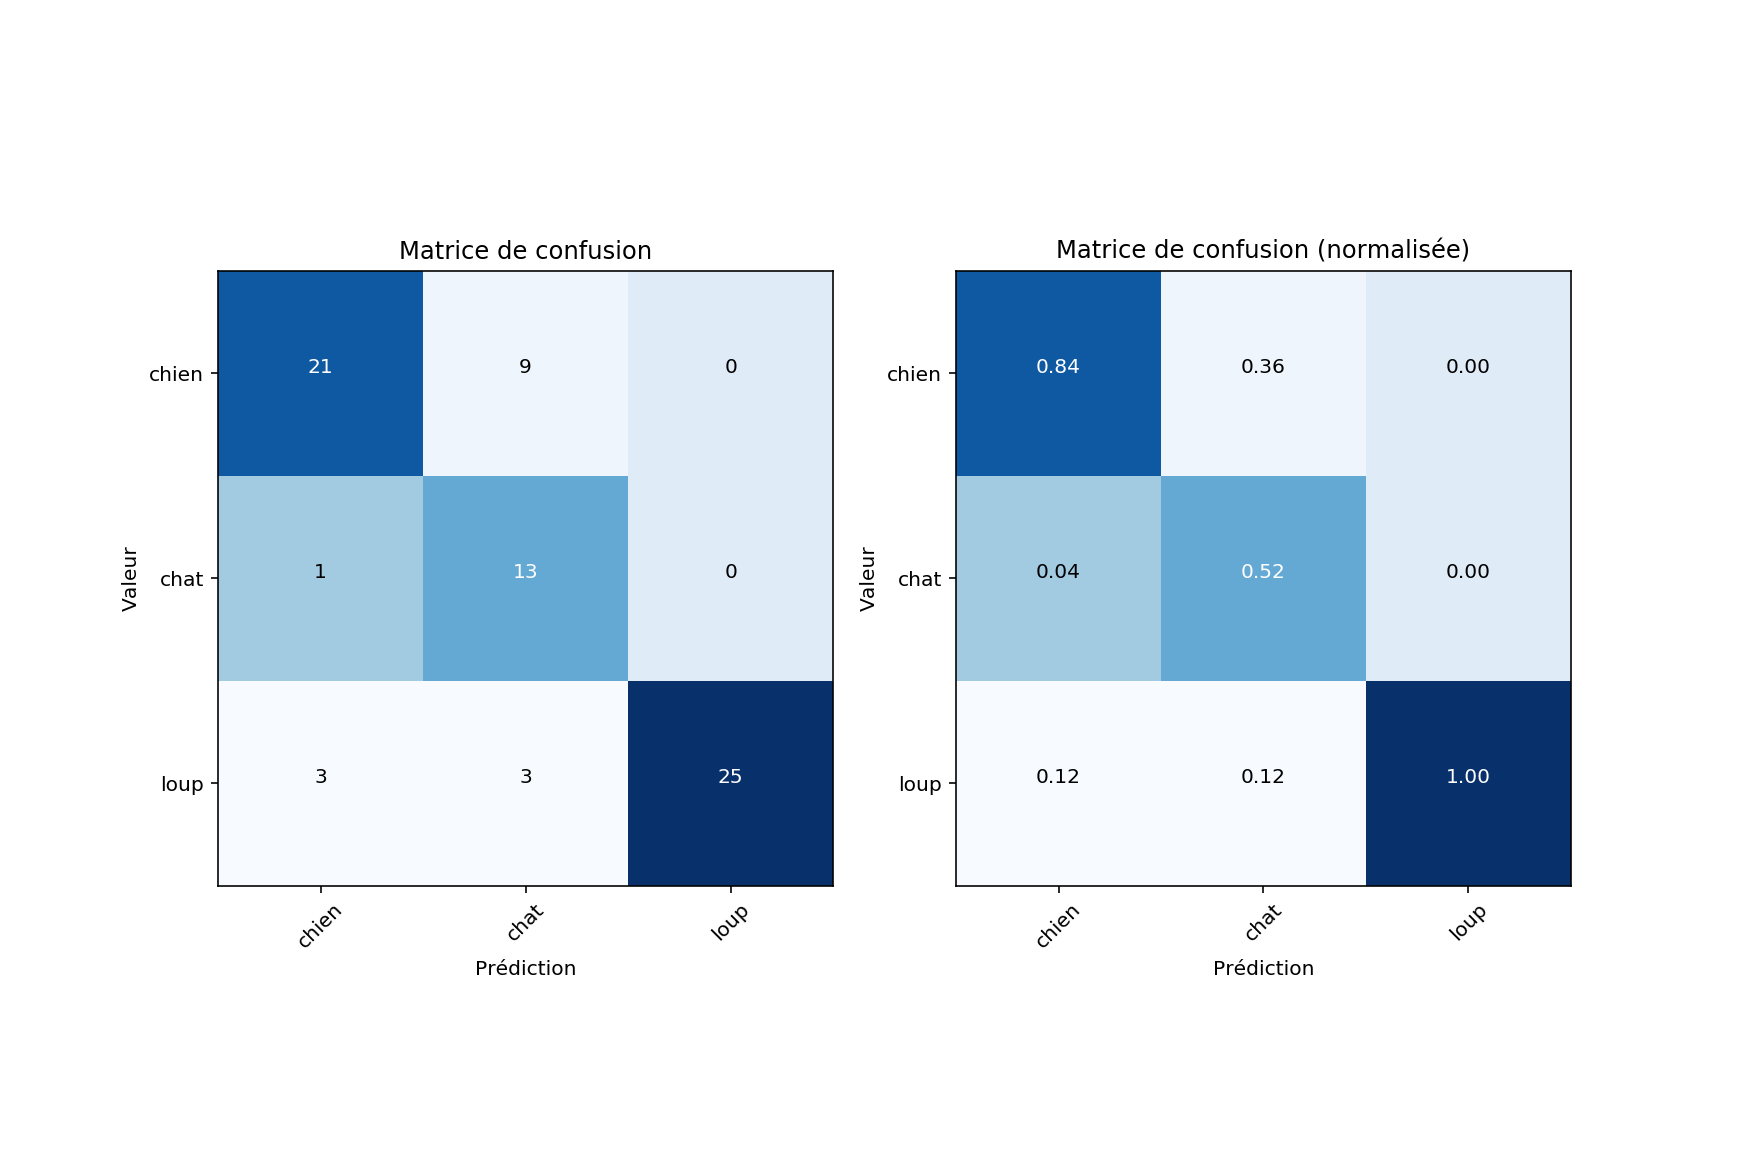

In [37]:
%run -i bin/learning.py
learning(
    learn=["chien{i:02}", "chat{i:02}", "loup{i:02}"], learn_i=[50, 50, 50], 
    test=["chien{i:02}", "chat{i:02}", "loup{i:02}"], test_i=[25, 25, 25], 
    options={"fmin":300, "fmax":12000, "nb_filters":16, "q":6, "n":3, "time_res":0.025, "amp_res":2},
    neurons=(100)
);